<a href="https://colab.research.google.com/github/DJS-INFOMATRIX/Machine-Learning/blob/main/HeartFailureClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset link : https://www.kaggle.com/datasets/aadarshvelu/heart-failure-prediction-clinical-records

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [2]:
df=pd.read_csv('/content/drive/MyDrive/csv files/heart_failure_clinical_records.csv')

In [3]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,55.0,0,748,0,45,0,263358.03,1.3,137,1,1,88,0
1,65.0,0,56,0,25,0,305000.00,5.0,130,1,0,207,0
2,45.0,0,582,1,38,0,319000.00,0.9,140,0,0,244,0
3,60.0,1,754,1,40,1,328000.00,1.2,126,1,0,90,0
4,95.0,1,582,0,30,0,461000.00,2.0,132,1,0,50,1


**The following are the descriptions of each of columns in the dataset :**

**age :** age of the patient (years)

**anaemia :** decrease of red blood cells or hemoglobin (boolean)

**creatinine phosphokinase (CPK) :** level of the CPK enzyme in the blood (mcg/L)

**diabetes :** if the patient has diabetes (boolean)

**ejection fraction :** percentage of blood leaving the heart at each contraction
(percentage)

**high blood pressure :** if the patient has hypertension (boolean)

**platelets :** platelets in the blood (kiloplatelets/mL)

**sex :** woman or man (binary)

**serum creatinine :** level of serum creatinine in the blood (mg/dL)

**serum sodium :** level of serum sodium in the blood (mEq/L)

**smoking :** if the patient smokes or not (boolean)

**time :** follow-up period (days)

**DEATH_EVENT :** if the patient died during the follow-up period (boolean)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       5000 non-null   float64
 1   anaemia                   5000 non-null   int64  
 2   creatinine_phosphokinase  5000 non-null   int64  
 3   diabetes                  5000 non-null   int64  
 4   ejection_fraction         5000 non-null   int64  
 5   high_blood_pressure       5000 non-null   int64  
 6   platelets                 5000 non-null   float64
 7   serum_creatinine          5000 non-null   float64
 8   serum_sodium              5000 non-null   int64  
 9   sex                       5000 non-null   int64  
 10  smoking                   5000 non-null   int64  
 11  time                      5000 non-null   int64  
 12  DEATH_EVENT               5000 non-null   int64  
dtypes: float64(3), int64(10)
memory usage: 507.9 KB


Checking for null values

In [5]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

Checking for outliers

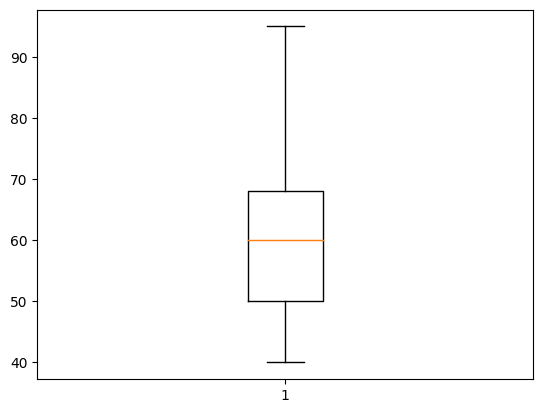

In [6]:
plt.boxplot(df['age'])
plt.show()

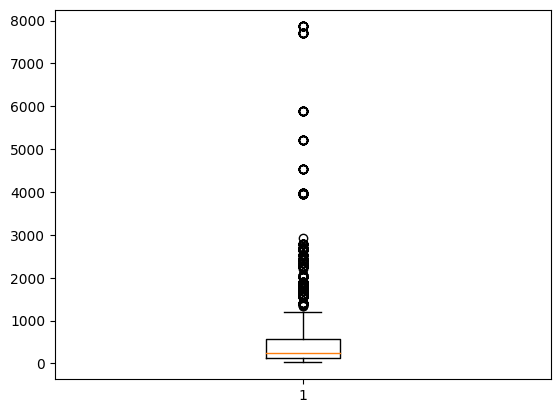

In [7]:
plt.boxplot(df['creatinine_phosphokinase'])
plt.show()

In [8]:
q1=df['creatinine_phosphokinase'].quantile(0.25)
q3=df['creatinine_phosphokinase'].quantile(0.75)

iqr=q3-q1

uw=q3+1.5*iqr
lw=q1-1.5*iqr

df.loc[df['creatinine_phosphokinase']>uw,'creatinine_phosphokinase']=uw
df.loc[df['creatinine_phosphokinase']<lw,'creatinine_phosphokinase']=lw

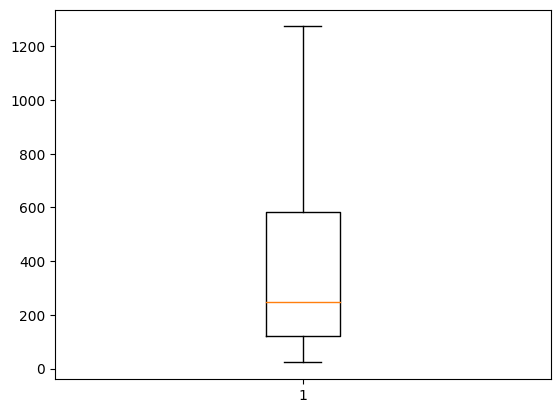

In [9]:
plt.boxplot(df['creatinine_phosphokinase'])
plt.show()

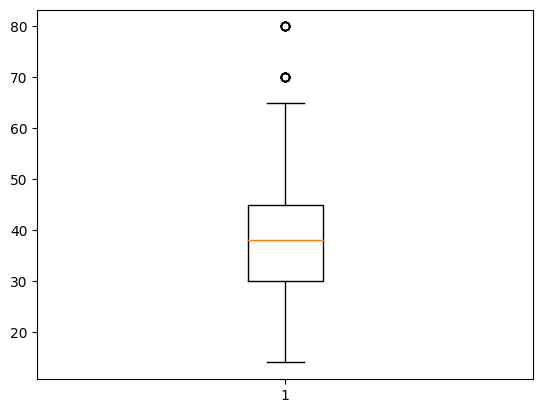

In [10]:
plt.boxplot(df['ejection_fraction'])
plt.show()

In [11]:
q1=df['ejection_fraction'].quantile(0.25)
q3=df['ejection_fraction'].quantile(0.75)

iqr=q3-q1

uw=q3+1.5*iqr
lw=q1-1.5*iqr

df.loc[df['ejection_fraction']>uw,'ejection_fraction']=uw
df.loc[df['ejection_fraction']<lw,'ejection_fraction']=lw

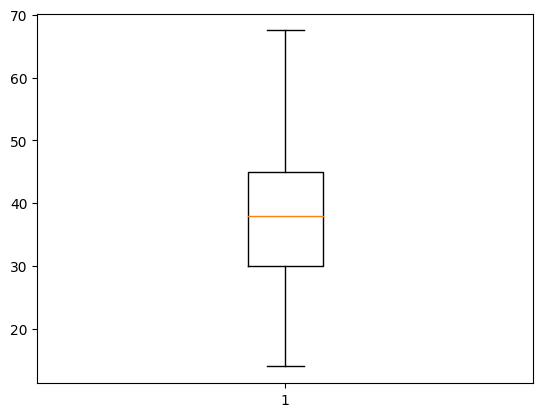

In [12]:
plt.boxplot(df['ejection_fraction'])
plt.show()

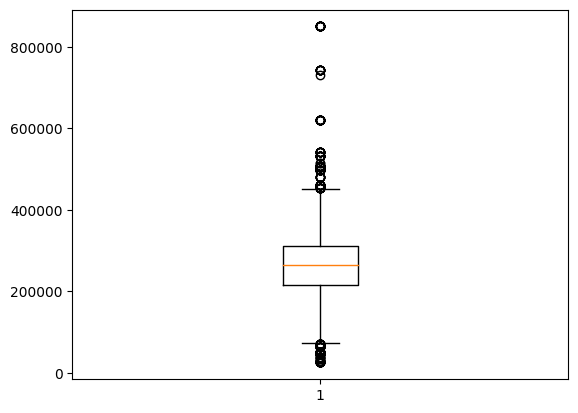

In [13]:
plt.boxplot(df['platelets'])
plt.show()

In [14]:
q1=df['platelets'].quantile(0.25)
q3=df['platelets'].quantile(0.75)

iqr=q3-q1

uw=q3+1.5*iqr
lw=q1-1.5*iqr

df.loc[df['platelets']>uw,'platelets']=uw
df.loc[df['platelets']<lw,'platelets']=lw

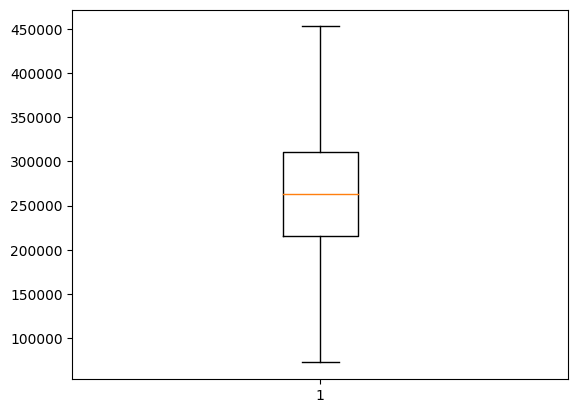

In [15]:
plt.boxplot(df['platelets'])
plt.show()

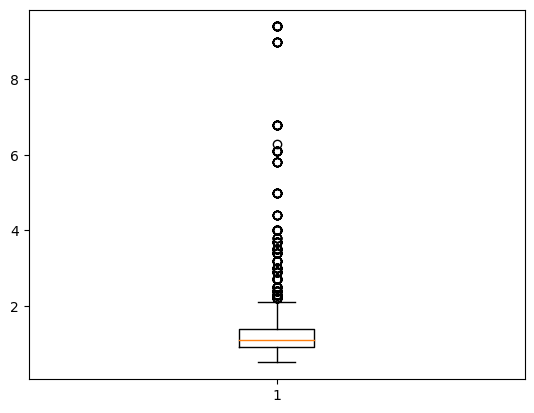

In [16]:
plt.boxplot(df['serum_creatinine'])
plt.show()

In [17]:
q1=df['serum_creatinine'].quantile(0.25)
q3=df['serum_creatinine'].quantile(0.75)

iqr=q3-q1

uw=q3+1.5*iqr
lw=q1-1.5*iqr

df.loc[df['serum_creatinine']>uw,'serum_creatinine']=uw
df.loc[df['serum_creatinine']<lw,'serum_creatinine']=lw

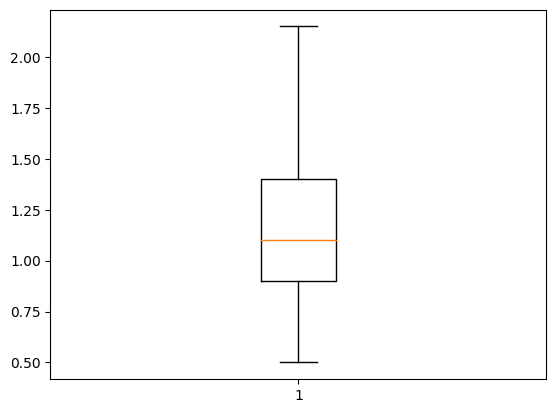

In [18]:
plt.boxplot(df['serum_creatinine'])
plt.show()

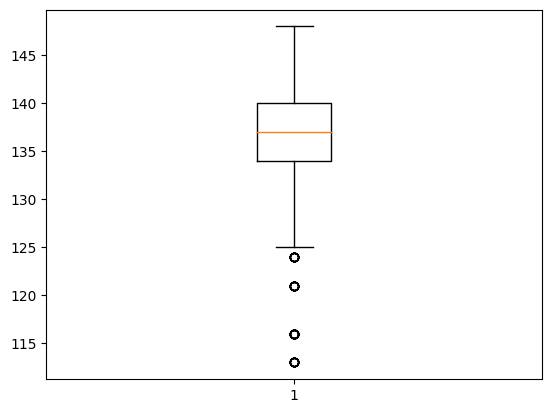

In [19]:
plt.boxplot(df['serum_sodium'])
plt.show()

In [20]:
q1=df['serum_sodium'].quantile(0.25)
q3=df['serum_sodium'].quantile(0.75)

iqr=q3-q1

uw=q3+1.5*iqr
lw=q1-1.5*iqr

df.loc[df['serum_sodium']>uw,'serum_sodium']=uw
df.loc[df['serum_sodium']<lw,'serum_sodium']=lw

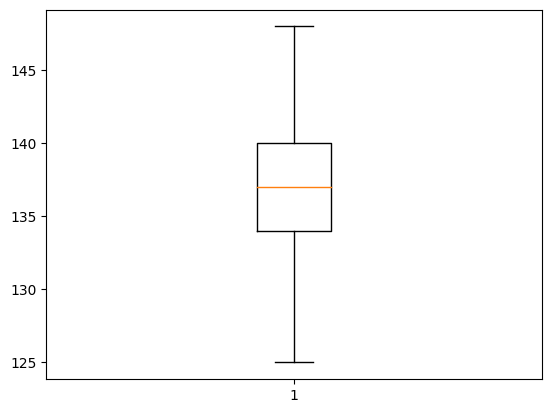

In [21]:
plt.boxplot(df['serum_sodium'])
plt.show()

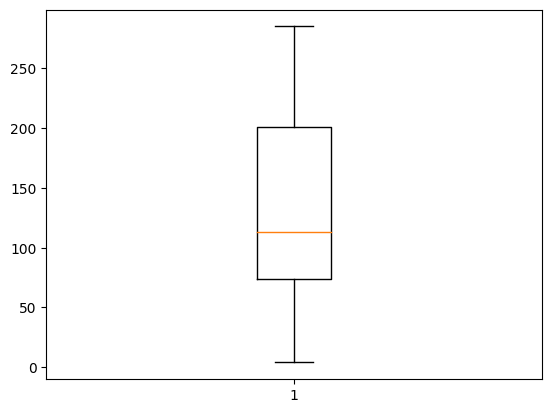

In [22]:
plt.boxplot(df['time'])
plt.show()

# Data Visualization

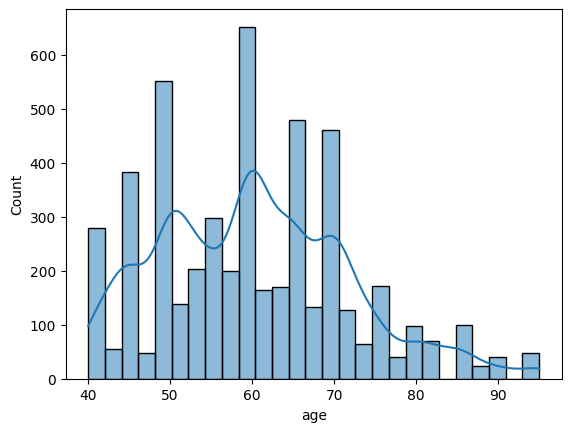

In [23]:
sns.histplot(df['age'],kde=True)
plt.show()

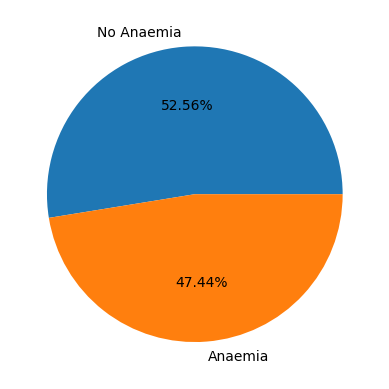

In [24]:
plt.pie(df['anaemia'].value_counts(),autopct='%.2f%%',labels=['No Anaemia',"Anaemia"])
plt.show()

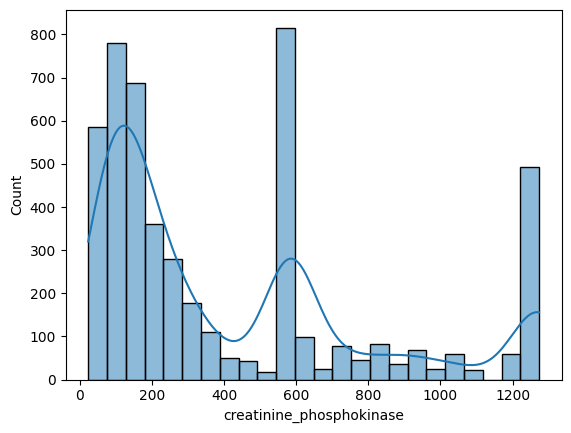

In [25]:
sns.histplot(df['creatinine_phosphokinase'],kde=True)
plt.show()

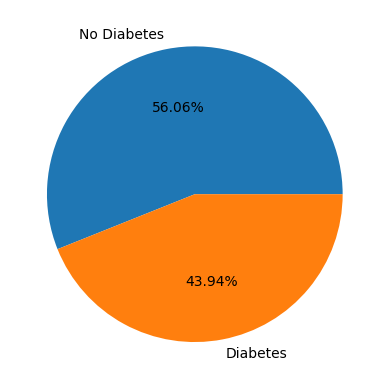

In [26]:
plt.pie(df['diabetes'].value_counts(),autopct='%.2f%%',labels=['No Diabetes','Diabetes'])
plt.show()

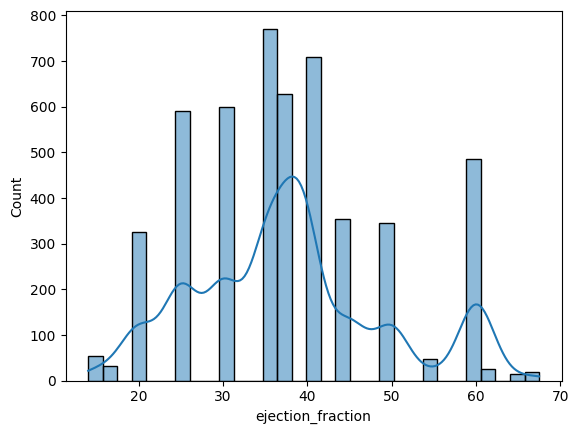

In [27]:
sns.histplot(df['ejection_fraction'],kde=True)
plt.show()

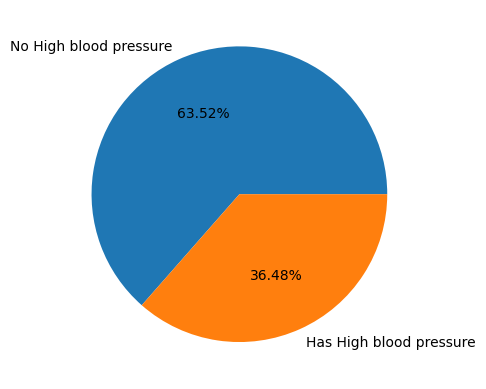

In [28]:
plt.pie(df['high_blood_pressure'].value_counts(),autopct='%.2f%%',labels=['No High blood pressure','Has High blood pressure'])
plt.show()

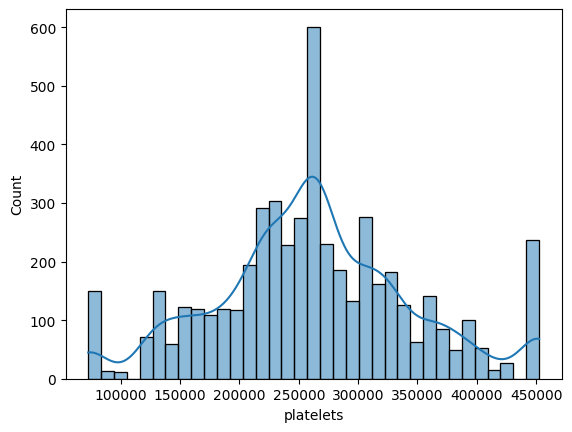

In [29]:
sns.histplot(df['platelets'],kde=True)
plt.show()

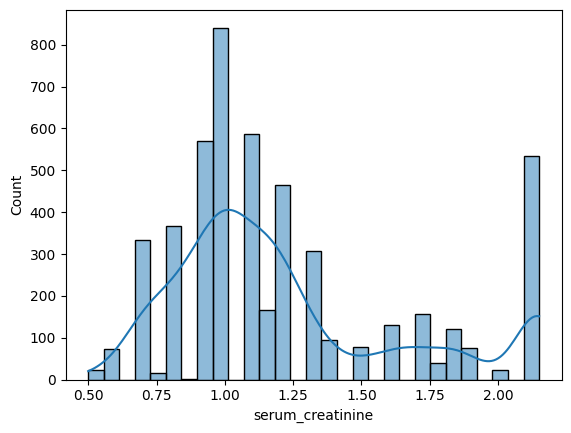

In [30]:
sns.histplot(df['serum_creatinine'],kde=True)
plt.show()

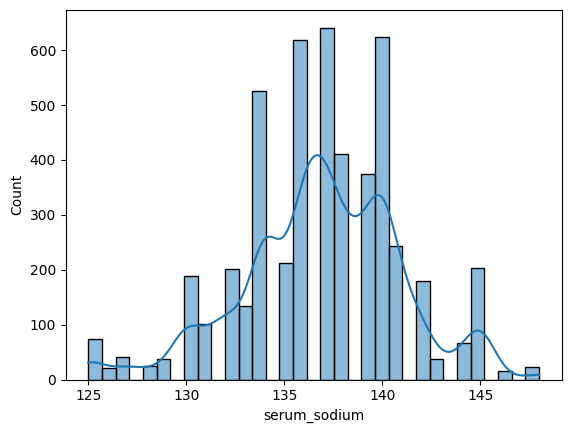

In [31]:
sns.histplot(df['serum_sodium'],kde=True)
plt.show()

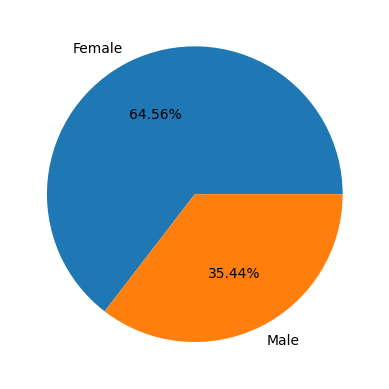

In [32]:
plt.pie(df['sex'].value_counts(),autopct='%.2f%%',labels=['Female','Male'])
plt.show()

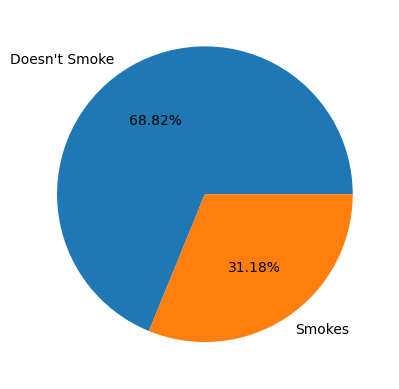

In [33]:
plt.pie(df['smoking'].value_counts(),autopct='%.2f%%',labels=['Doesn\'t Smoke','Smokes'])
plt.show()

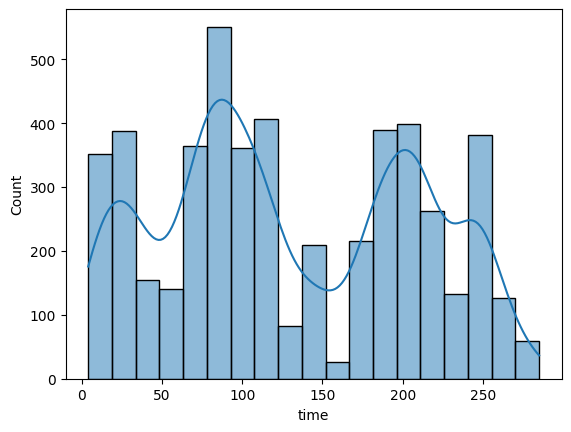

In [34]:
sns.histplot(df['time'],kde=True)
plt.show()

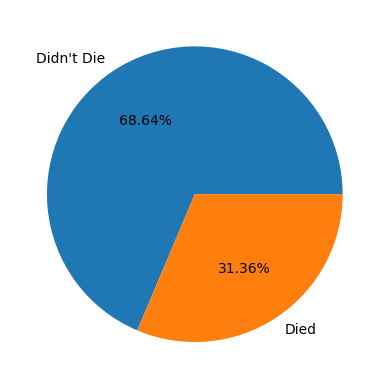

In [35]:
plt.pie(df['DEATH_EVENT'].value_counts(),autopct='%.2f%%',labels=['Didn\'t Die','Died'])
plt.show()

1568


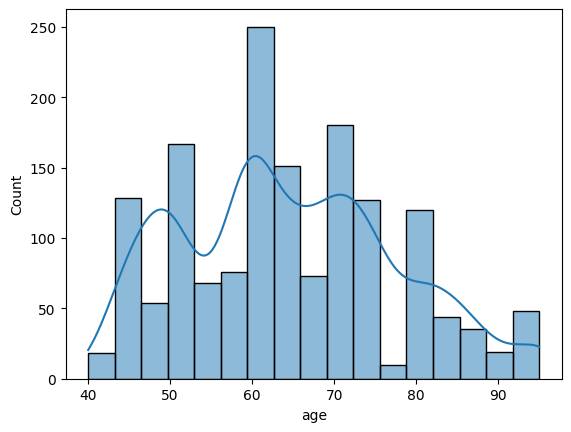

In [36]:
temp=df[df['DEATH_EVENT']==1]['age']
print(temp.value_counts().sum())
sns.histplot(temp,kde=True)
plt.show()

The majority of the deaths are of the patients aged between 60 and 70 years. This is probably due to the fact that majority of the people in this data are in the age group of 50 years to 70 years.

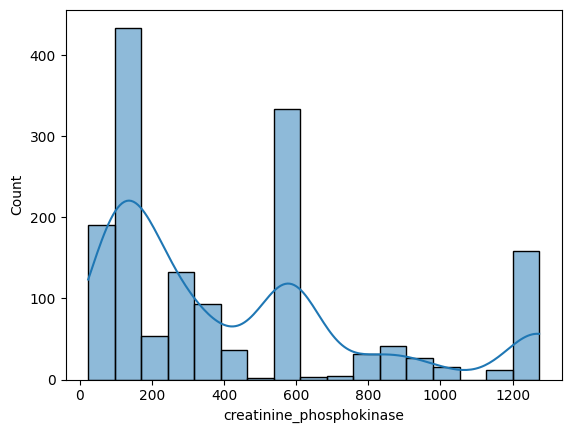

In [37]:
temp=df[df['DEATH_EVENT']==1]['creatinine_phosphokinase']
sns.histplot(temp,kde=True)
plt.show()

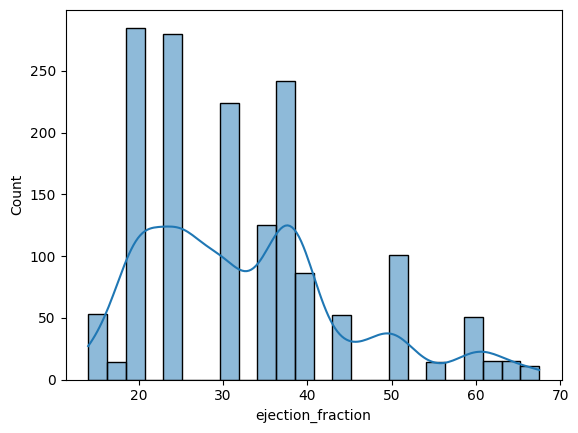

In [38]:
temp=df[df['DEATH_EVENT']==1]['ejection_fraction']
sns.histplot(temp,kde=True)
plt.show()

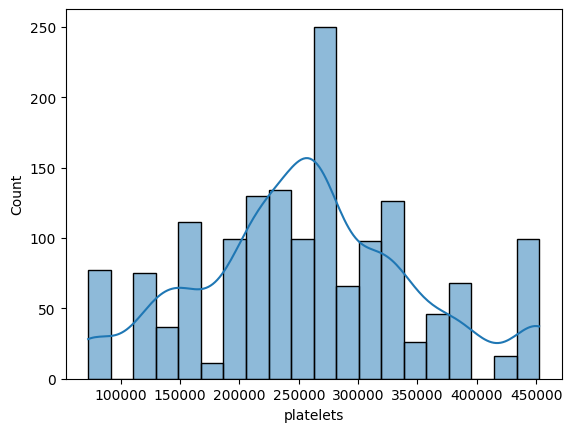

In [39]:
temp=df[df['DEATH_EVENT']==1]['platelets']
sns.histplot(temp,kde=True)
plt.show()

# Setting up ML models

In [40]:
min_val = df['age'].min()
max_val = df['age'].max()
df['age'] = (df['age'] - min_val) / (max_val - min_val)

min_val = df['creatinine_phosphokinase'].min()
max_val = df['creatinine_phosphokinase'].max()
df['creatinine_phosphokinase'] = (df['creatinine_phosphokinase'] - min_val) / (max_val - min_val)

min_val = df['diabetes'].min()
max_val = df['diabetes'].max()
df['diabetes'] = (df['diabetes'] - min_val) / (max_val - min_val)

min_val = df['ejection_fraction'].min()
max_val = df['ejection_fraction'].max()
df['ejection_fraction'] = (df['ejection_fraction'] - min_val) / (max_val - min_val)

min_val = df['platelets'].min()
max_val = df['platelets'].max()
df['platelets'] = (df['platelets'] - min_val) / (max_val - min_val)

min_val = df['serum_creatinine'].min()
max_val = df['serum_creatinine'].max()
df['serum_creatinine'] = (df['serum_creatinine'] - min_val) / (max_val - min_val)

min_val = df['serum_sodium'].min()
max_val = df['serum_sodium'].max()
df['serum_sodium'] = (df['serum_sodium'] - min_val) / (max_val - min_val)

min_val = df['time'].min()
max_val = df['time'].max()
df['time'] = (df['time'] - min_val) / (max_val - min_val)

In [41]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,0.272727,0,0.579768,0.0,0.579439,0,0.502258,0.484848,0.521739,1,1,0.298932,0
1,0.454545,0,0.026389,0.0,0.205607,0,0.611842,1.000000,0.217391,1,0,0.722420,0
2,0.090909,0,0.447021,1.0,0.448598,0,0.648684,0.242424,0.652174,0,0,0.854093,0
3,0.363636,1,0.584566,1.0,0.485981,1,0.672368,0.424242,0.043478,1,0,0.306050,0
4,1.000000,1,0.447021,0.0,0.299065,0,1.000000,0.909091,0.304348,1,0,0.163701,1


Since there are no categorical data, we didn't make use of label encoders. Label encoders are used to convert the categorical data to numeric. It counts the unique values and assigns each unique value a number in ascending order starting from 0.

Now, we will see the number of occurences of datapoints where the patient died and the number of patients that didn't die. This, will be useful for us to know if we need to oversample for a certain category.

In [42]:
print(len(df[df["DEATH_EVENT"]==0]))
print(len(df[df["DEATH_EVENT"]==1]))

3432
1568


As we can see there are way too many datapoints of the category that the patient didn't die while there are substantially lesser datapoints for patients that died.

In [43]:
from imblearn.over_sampling import RandomOverSampler

def datasetSampler(dataframe,oversample=False):
  x=dataframe[dataframe.columns[:-1]].values    #Splits the dataframe consisting of all the columns other than the output column.
  y=dataframe[dataframe.columns[-1]].values   #Splits the dataframe into the result column

  if oversample:                      #This is used to over sample in case a certain result has lesser data points in the given dataset
    ros=RandomOverSampler()
    x,y=ros.fit_resample(x,y)

  data=np.hstack((x,np.reshape(y,(-1,1))))    #hstack() is used to stack the input columns and output column in a horizontal manner.
                                              #Also since x is 2 dimensional and y is single dimension we need to reshape the dimension of y for hstack() to work.

  return data,x,y

data,X,Y=datasetSampler(df,True)

In [44]:
print(sum(Y==0))
print(sum(Y==1))

3432
3432


Thus, we can see that now both the categories have equal number of datapoints allowing the ML model to train for both categories equally.

Stratification is the process by which we maintain the percentage of the categories in the original dataset to that in the training and testing dataset. Thus, we make use of the stratify parameter while splitting the dataset into training and testing.

In [45]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=4,stratify=Y,test_size=0.1)

# K-Nearest Neighbours (KNN)

Explaination video : https://youtu.be/0p0o5cmgLdE?si=W5SOwq1xIiC_ZqA8

In [46]:
from sklearn.metrics import classification_report

In [47]:
from sklearn.neighbors import KNeighborsClassifier

knn_model=KNeighborsClassifier(n_neighbors=10)   #The parameter n_neighbor is used as the value of k that will be used to predict the outcome based on the number of nearest neighbors
knn_model.fit(X_train,Y_train)    #The .fit() function is used to fit the training set in the pre-defined ML algorithm

KNeighborsClassifier(n_neighbors=10)

In [48]:
Y_pred=knn_model.predict(X_test)    #We use the input columns from the test set to make predictions. The .predict() function is used to predict based on the test data set

In [49]:
Y_pred

array([0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,

In [50]:
print(classification_report(Y_test,Y_pred))   #Using classification reports we cross-checked our predicted output with the output that we already had.

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       344
           1       0.98      0.94      0.96       343

    accuracy                           0.96       687
   macro avg       0.96      0.96      0.96       687
weighted avg       0.96      0.96      0.96       687



In [51]:
confusion_matrix(Y_test,Y_pred)

array([[338,   6],
       [ 19, 324]])

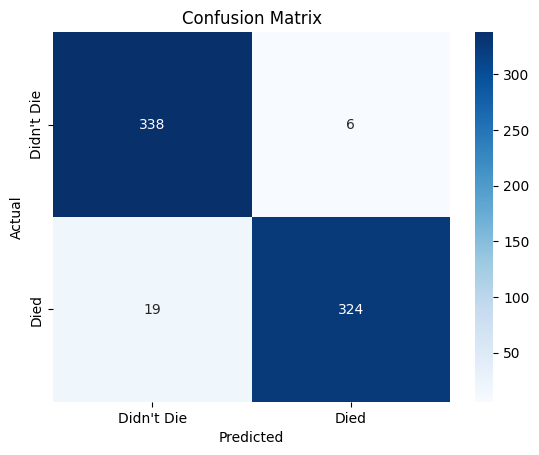

In [52]:
cm=confusion_matrix(Y_test,Y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Didn\'t Die', 'Died'], yticklabels=['Didn\'t Die', 'Died'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Confusion Matrix explaination : https://www.youtube.com/watch?v=H2M3fT1njXQ

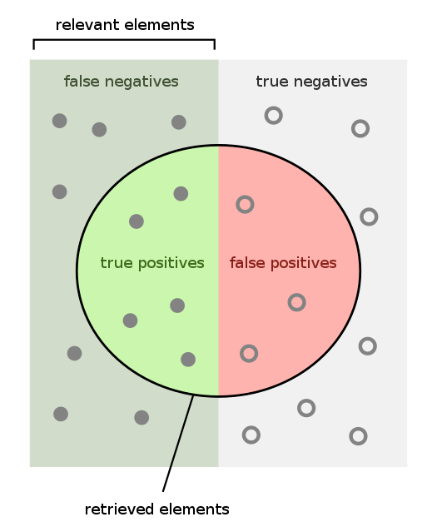

To understand what the classification report means we must understand what the different terms mean :

**1)True Positive :** These are the values that are actually positive and the considered to be positive.So, in summary they are correctly identified postive cases.

**2) False Positive :** These are values which are actually negative but are considered to be positive.So, in summary they are incorrectly identified postivie cases.


**3)Precision :** It is the ratio of the number of true positives to the total number of retrieved elements. It has the following formula,

  Precision = True Positives (TP) / (True Positives (TP) + False Positives (FP))

Example : ​Imagine a scenario where you're building a model to identify fraudulent transactions. Out of 100 transactions, 5 are fraudulent, and your model identifies 8 transactions as fraudulent. If only 4 of these 8 are actually fraudulent, then the precision of your model in detecting fraud is 4/8 or 50%.

**4)Recall :** It is the ratio of the number of true positives to the sum of the number of true positives and number of false negatives. It has the following formula,

Recall = True Positives (TP) / (True Positives (TP) + False Negatives (FN))

​Example : Consider a medical diagnosis scenario where out of 100 patients, 10 actually have a certain disease. If your diagnostic model correctly identifies 8 of these 10 patients but misses 2, then the recall of your model is 8/10 or 80%.

**F-1 score :** It is the harmonic mean of the precision and the recall.

F1 = 2 * (precision * recall) / (precision + recall)

**5)Accuracy :** It is the percentage of the number of outputs that were predicted correctly, in the sense that the predicted value and the actual output are the same.


# Naive Bayes' Theorem

Explaination video : https://youtu.be/O2L2Uv9pdDA?si=XSqSvL5260cP3PBn

Solving Naive Bayes' problem on paper : https://youtu.be/XzSlEA4ck2I?si=eWcWh0lZ7acCB7H2

In [53]:
from sklearn.naive_bayes import GaussianNB

nb_model=GaussianNB()
nb_model=nb_model.fit(X_train,Y_train)

In [54]:
Y_pred=nb_model.predict(X_test)
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.83      0.84      0.83       344
           1       0.84      0.83      0.83       343

    accuracy                           0.83       687
   macro avg       0.83      0.83      0.83       687
weighted avg       0.83      0.83      0.83       687



In [55]:
confusion_matrix(Y_test,Y_pred)

array([[288,  56],
       [ 59, 284]])

# Logistic Regression

Explaination video : https://youtu.be/yIYKR4sgzI8?si=oIJyVEm74VzrKwpT

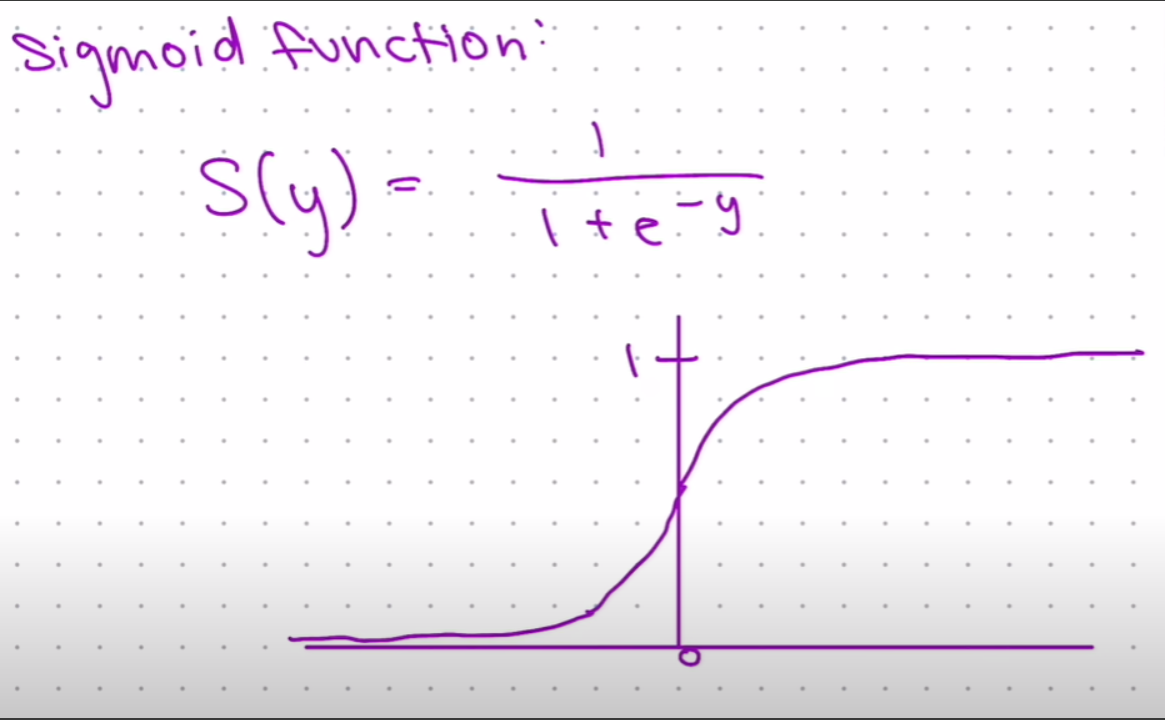

In [79]:
from sklearn.linear_model import LogisticRegression

lr_model=LogisticRegression(max_iter=30)   #max_iter is used to increase the maximum limit of the number of iterations possible.
lr_model=lr_model.fit(X_train,Y_train)

In [80]:
Y_pred=lr_model.predict(X_test)
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.82      0.81      0.81       344
           1       0.81      0.82      0.81       343

    accuracy                           0.81       687
   macro avg       0.81      0.81      0.81       687
weighted avg       0.81      0.81      0.81       687



# Decision Tree Classifier

Explaination video : https://www.youtube.com/watch?v=xDWZzD4TPO0

In [58]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier() #Here we haven't set any parameters therefore it will be using the default parameters.
print(dtc.get_params())

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}


In [59]:
dtc=dtc.fit(X_train,Y_train)

Y_pred=dtc.predict(X_test)

In [60]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       344
           1       0.99      0.99      0.99       343

    accuracy                           0.99       687
   macro avg       0.99      0.99      0.99       687
weighted avg       0.99      0.99      0.99       687



In [61]:
confusion_matrix(Y_test,Y_pred)

array([[342,   2],
       [  3, 340]])

# Random Forest Classifier

Explaination video : https://www.youtube.com/watch?v=gkXX4h3qYm4

In [62]:
from sklearn.ensemble import RandomForestClassifier

# Since our data consists of more than two possible categories we will set criterion to 'entropy'. I will leave the other parameters to be the default. Default no. of trees is 100
rfc=RandomForestClassifier(criterion='entropy')
rfc=rfc.fit(X_train,Y_train)
rfc.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [63]:
Y_pred=rfc.predict(X_test)
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       344
           1       1.00      0.99      0.99       343

    accuracy                           0.99       687
   macro avg       0.99      0.99      0.99       687
weighted avg       0.99      0.99      0.99       687



In [64]:
confusion_matrix(Y_test,Y_pred)

array([[343,   1],
       [  5, 338]])

# Support Vector Machines (SVM)

Explaination video : https://www.youtube.com/watch?v=ny1iZ5A8ilA

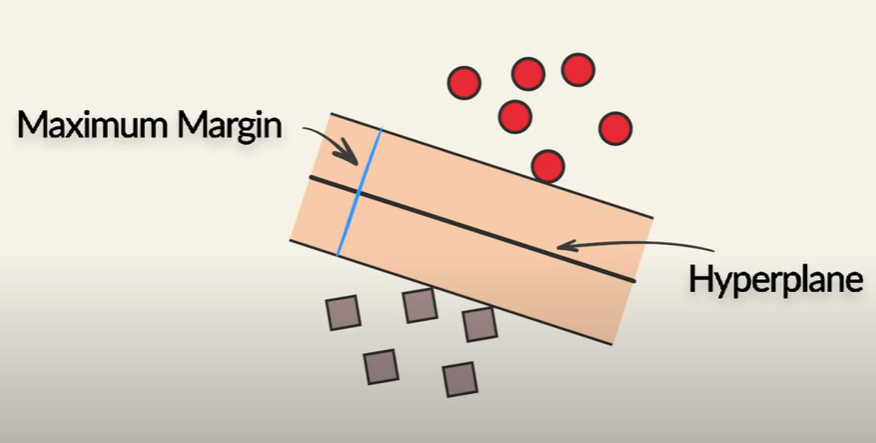

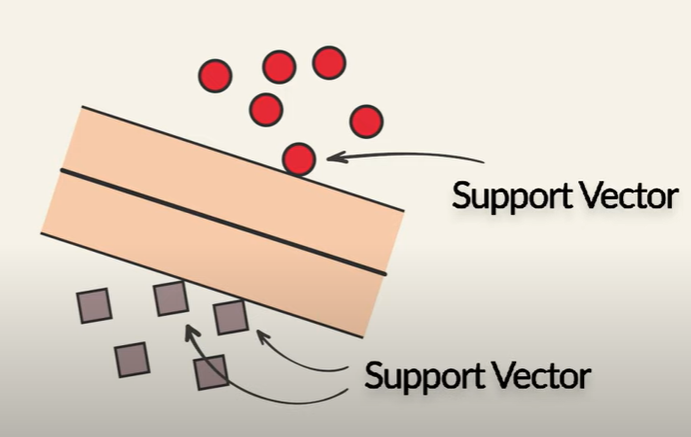

In [65]:
from sklearn.svm import SVC

svm_model=SVC()
svm_model=svm_model.fit(X_train,Y_train)

In [66]:
Y_pred=svm_model.predict(X_test)
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       344
           1       0.96      0.97      0.96       343

    accuracy                           0.96       687
   macro avg       0.96      0.96      0.96       687
weighted avg       0.96      0.96      0.96       687



In [67]:
confusion_matrix(Y_test,Y_pred)

array([[329,  15],
       [ 12, 331]])

# XGBoost Classifier

Explaination video : https://youtu.be/BC99nCeZ7t8?si=S5cRG4uaGvIUVwNN

In [68]:
import xgboost as xgb
from xgboost import DMatrix

clf_xgb=xgb.XGBClassifier(objective='binary:logistic', missing=0, verbosity=2, random_state=24, early_stopping_rounds=10, eval_metric='aucpr')

#Verbosity will help us print the information about the training at each step, setting it to 2 will give all the information.
#This means, 10 trees will be made even after the reduced efficiency is detected.
#It stands for area under precision-recall curve. It is used for binary classification.

clf_xgb.fit(X_train,Y_train,eval_set=[(X_test,Y_test)])

#Passing in the testing data to evaluate the efficiency of the model for each tree that is being generated in the forest of XGBoost trees.

[0]	validation_0-aucpr:0.98583
[1]	validation_0-aucpr:0.99141
[2]	validation_0-aucpr:0.99272
[3]	validation_0-aucpr:0.99576
[4]	validation_0-aucpr:0.99700
[5]	validation_0-aucpr:0.99771
[6]	validation_0-aucpr:0.99794
[7]	validation_0-aucpr:0.99789
[8]	validation_0-aucpr:0.99806
[9]	validation_0-aucpr:0.99813
[10]	validation_0-aucpr:0.99845
[11]	validation_0-aucpr:0.99829
[12]	validation_0-aucpr:0.99830
[13]	validation_0-aucpr:0.99839
[14]	validation_0-aucpr:0.99841
[15]	validation_0-aucpr:0.99858
[16]	validation_0-aucpr:0.99879
[17]	validation_0-aucpr:0.99916
[18]	validation_0-aucpr:0.99925
[19]	validation_0-aucpr:0.99934
[20]	validation_0-aucpr:0.99952
[21]	validation_0-aucpr:0.99967
[22]	validation_0-aucpr:0.99974
[23]	validation_0-aucpr:0.99980
[24]	validation_0-aucpr:0.99983
[25]	validation_0-aucpr:0.99983
[26]	validation_0-aucpr:0.99982
[27]	validation_0-aucpr:0.99980
[28]	validation_0-aucpr:0.99982
[29]	validation_0-aucpr:0.99983
[30]	validation_0-aucpr:0.99981
[31]	validation_0-

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=10,
              enable_categorical=False, eval_metric='aucpr', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=0, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=24, ...)

In [69]:
Y_pred=clf_xgb.predict(X_test)
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       344
           1       0.99      0.99      0.99       343

    accuracy                           0.99       687
   macro avg       0.99      0.99      0.99       687
weighted avg       0.99      0.99      0.99       687



In [70]:
confusion_matrix(Y_test,Y_pred)

array([[341,   3],
       [  2, 341]])